In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps
x=tensor([[ 0.9268+0.4026j,  0.0202+0.6113j, -0.0781-0.7256j],
        [-0.1997-0.1165j, -0.8940+1.3135j,  0.0740+0.3562j],
        [-0.1752+2.3418j,  1.1299+0.4841j,  1.1406+0.3213j],
        [ 0.4409-0.3447j,  0.4763+0.5977j,  0.3464+0.2473j],
        [-0.4260-0.7339j,  0.1119-0.8433j, -0.4819+0.8105j]],
       dtype=torch.complex32)

y=tensor([[ 0.9268,  0.0202, -0.0781],
        [ 0.4026,  0.6113, -0.7256],
        [-0.1997, -0.8940,  0.0740],
        [-0.1165,  1.3135,  0.3562],
        [-0.1752,  1.1299,  1.1406],
        [ 2.3418,  0.4841,  0.3213],
        [ 0.4409,  0.4763,  0.3464],
        [-0.3447,  0.5977,  0.2473],
        [-0.4260,  0.1119, -0.4819],
        [-0.7339, -0.8433,  0.8105]])

z=tensor([[ 0.9268+0.4026j,  0.0202+0.6113j, -0.0781-0.7256j],
        [-0.1997-0.1165j, -0.8940+1.3135j,  0.0740+0.3562j],
        [-0.1752+2.3418j,  1.1299+0.4841j,  1.140

/Users/Richard/Coding/SampleGen/MakeSTFTs.py:183: UserWarning: ComplexHalf support is experimental and many operators don't support it yet. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/EmptyTensor.cpp:32.)
  x = torch.randn(5, 3, dtype=torch.complex32)
/Users/Richard/Coding/SampleGen/AudioUtils.py:71: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_name)


stft = numpy.ndarray(513, 250) x complex64, size=128,250 elements = 1,026,000 bytes
truncated = numpy.ndarray(513, 114) x complex64, size=58,482 elements = 467,856 bytes


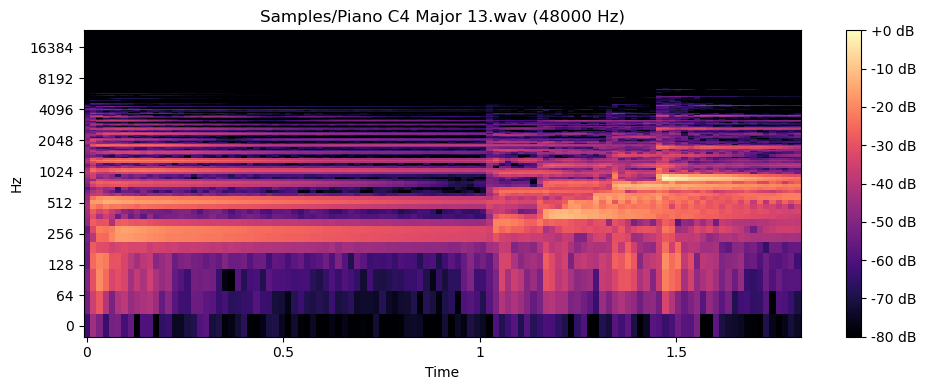

tensor = Torch.Tensor[513, 114] x torch.complex64, size=58,482 elements = 467,856 bytes, device=cpu
input = Torch.Tensor[1024, 114] x torch.float32, size=116,736 elements = 466,944 bytes, device=mps:0
input: min=-0.80364, max=0.75049
output = numpy.ndarray(513, 114) x complex64, size=58,482 elements = 467,856 bytes
output: min=-223.41214, max=208.63531-79.46612j


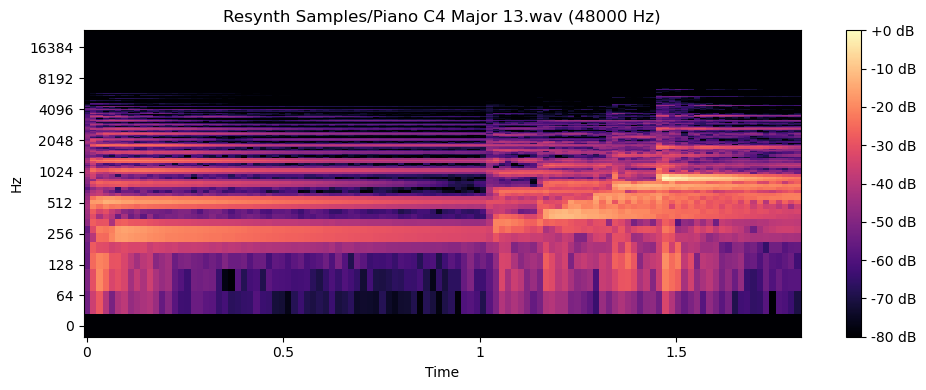

diff = numpy.ndarray(513, 114) x float32, size=58,482 elements = 233,928 bytes


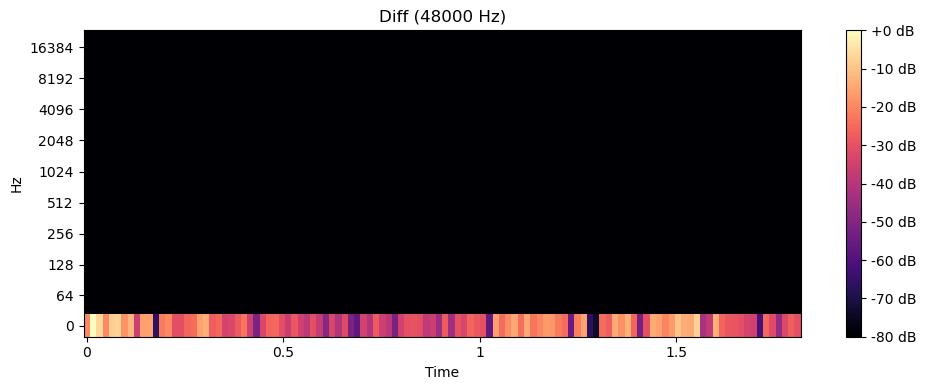

In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 961 STFTs from STFTs.pkl


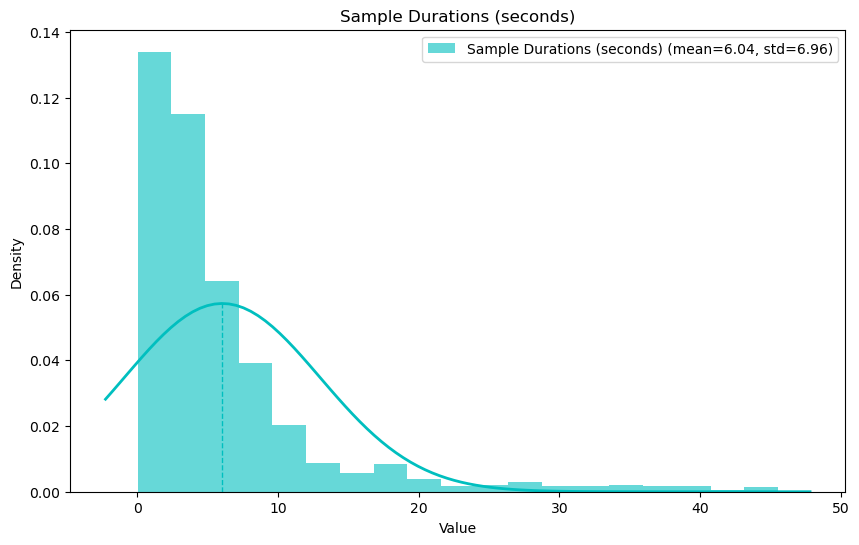

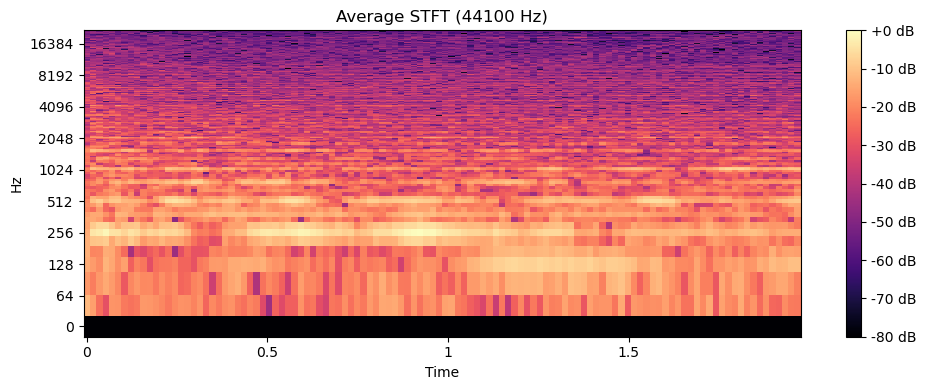

Augmenting training dataset using 190 random mixes
Using train=950 samples, test=190 samples.
1024 frequencies, 114 time-steps, maximum model size is 22,179,840 parameters.
Using model=Incremental_StepWiseVAEMLP
Optimising hyper-parameters:


[Integer(low=2, high=4, prior='uniform', transform='identity'),
 Real(low=1e-07, high=0.01, prior='log-uniform', transform='identity'),
 Real(low=1e-09, high=0.01, prior='log-uniform', transform='identity'),
 Integer(low=4, high=20, prior='uniform', transform='identity'),
 Integer(low=1, high=7, prior='uniform', transform='identity'),
 Real(low=0.2, high=5, prior='uniform', transform='identity')]

Hyper-Parameter tuning#1: [3, 9.670789726516684e-07, 0.006983369320942891, 7, 6, 4.865836132707192]

optimiser: Adam batch=8, learning_rate=7.7e-06, weight_decay=0.007
Using model=StepWiseMLP
make_stepwiseMLPVAE: [165, 4, 0.3187354618451725, 7, 6, 4.865836132707192]
StepWiseMLP control=165, depth=4, ratio=0.32, latent=7, VAE depth=6, VAE ratio=4.87
Model is too large: approx 2,483,127,432 parameters vs max=22,179,840
Hyper-Parameter tuning#2: [2, 0.0003058172230834961, 2.208335279632293e-06, 15, 3, 2.4658361327071923]

optimiser: Adam batch=4, learning_rate=0.0012, weight_decay=2.2e-06
StepWiseMLP control=15, depth=3, ratio=2.47
StepWiseMLPAutoEncoder 5,606,863 parameters, compression=68.3
StepWiseMLP 5,606,863 parameters
model: StepWiseMLP control=15, depth=3, ratio=2.47 (5,606,863 parameters)
train=950 samples, batch=4 --> 237.5 batches/epoch
*** Aborting: model exploded! loss=nan vs max=30000
Hyper-Parameter tuning#3: [3, 1.7197366249480598e-05, 0.00012418381876130237, 11, 5, 1.2658

In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
optimise_hyper_parameters()

# Alternatively: train a model with the best hyper-parameters we've found so far.
#train_best_params()

In [ ]:
# Generate some new samples, either by interpolation or random perturbation
from Generate import *

# Test every sample and measure the error.
test_all()

# Create graphs of pair-wise encoding plots for a number of categories:
#plot_categories(["Vocal", "Piano", "Strings"])
plot_categories()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

#generate_morphs()

#generate_variations()

# Generate samples from each variable
#generate_main_encodings()